# What drives the price of a car?

![](./images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = ./images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Required Outputs (CRISP-DM)
- Determine Business Objectives
  - Business Objectives
  - Business Success Criteria
- Assess Situation
  - Inventory of Resources
  - Requirements, Assumptions, and Constraints
  - Risks and Contingencies
  - Terminology
  - Costs and Benefits
- Determine Data Mining Goals
  - Data Mining Goals
  - Data Mining Success Criteria
- Produce Project Plan
  - Project Plan
  - Initial Assessment of Tools and Techniques

#### Business Understanding

**Business Objectives**
For the dealership, the goal is to price used vehicles more accurately and consistently so units sell faster without leaving money on the table. This project identifies the vehicle attributes that drive price (for example age, mileage, make/model, condition-related fields, and market/location signals) and turns those findings into pricing and inventory recommendations your team can apply.

**Business Success Criteria**
- Improve pricing consistency across similar vehicles and reduce manual guesswork.
- Achieve a practical prediction error target (reported as MAE/RMSE) that is useful for lot-level pricing decisions.
- Produce clear inventory guidance on which vehicle profiles hold value better and which profiles require tighter acquisition pricing.
- Deliver recommendations that sales managers can use immediately in appraisal, acquisition, and listing workflows.

**Inventory of Resources**
- Data: `./data/vehicles.csv` (used-car listings subset, ~426K records).
- Tools: Python, pandas/numpy, visualization libraries, scikit-learn, Jupyter notebook.
- Output: notebook report and executive summary in `README.md`.

**Requirements, Assumptions, and Constraints**
- Requirement: build an interpretable and reliable pricing model with actionable insights.
- Assumption: listing price is a reasonable proxy for market value, with known noise.
- Assumption: available features capture enough of vehicle and market context to estimate price.
- Constraint: possible missingness, inconsistent entries, and potential outliers in listing data.

**Risks and Contingencies**
- Risk: data quality issues can bias price drivers.
  - Contingency: enforce cleaning rules, document exclusions, and validate sensitivity.
- Risk: model may underperform in niche segments.
  - Contingency: evaluate segmented performance and consider segment-specific models.
- Risk: market shifts over time can reduce model usefulness.
  - Contingency: define monitoring and retraining cadence in Deployment.

**Terminology**
- Target variable: `price`.
- Feature/driver: an input variable used to explain or predict `price`.
- MAE (Mean Absolute Error)/RMSE (Root Mean Squared Error): error metrics used to measure pricing accuracy.

**Costs and Benefits**
- Costs: analyst time, data cleaning effort, model maintenance.
- Benefits: better acquisition decisions, tighter listing prices, and improved speed/consistency in pricing decisions.

**Data Mining Goals**
Frame the business problem as a supervised regression task: predict used-car `price` from vehicle and listing attributes, and quantify each feature's impact on expected price.

**Data Mining Success Criteria**
- Establish a baseline model and outperform it with tuned models.
- Use cross-validation to confirm stable performance.
- Report at least one primary metric (MAE preferred for business interpretability) and one secondary metric (RMSE).
- Produce an interpretable ranking of top price drivers and convert them into dealership actions.

**Project Plan (Initial)**
1. Data Understanding: profile data, missingness, outliers, and target behavior.
2. Data Preparation: clean invalid records, engineer features (for example vehicle age), encode/scale as needed.
3. Modeling: train baseline and advanced regressors with cross-validation and hyperparameter tuning.
4. Evaluation: compare models to success criteria; translate results into business impact.
5. Deployment: provide pricing/inventory playbook plus monitoring and retraining recommendations.

**Initial Assessment of Tools and Techniques**
- Modeling candidates: Linear/Ridge/Lasso and tree-based ensemble methods.
- Validation: K-fold cross-validation with holdout test set.
- Interpretability: feature importance / coefficient review and error analysis by segment.



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Required Outputs (CRISP-DM)
- Collect Initial Data
  - Initial Data Collection Report
- Describe Data
  - Data Description Report
- Explore Data
  - Data Exploration Report
- Verify Data Quality
  - Data Quality Report

#### Data Understanding

**Collect Initial Data - Initial Data Collection Report**
- Source: Kaggle used-car listing subset provided with the assignment (`./data/vehicles.csv`).
- Shape: **426,880 rows x 18 columns**.
- Unit of analysis: one used-vehicle listing per row.
- Business context: data is broad enough to support dealership pricing and inventory strategy decisions.

**Describe Data - Data Description Report**
- Target variable: `price`.
- Feature coverage includes vehicle details (year, manufacturer, model, type, fuel, transmission, drive), usage (`odometer`), condition/status fields, and market context (`region`, `state`).
- Data mix: numeric and categorical fields with several high-cardinality categories.
- Key `price` distribution stats from the current dataset:
  - Median: **$13,950**
  - 75th percentile: **$26,485.75**
  - 95th percentile: **$44,500**
  - Max: **$3,736,929,000** (clear extreme outlier signal)

**Explore Data - Data Exploration Report**
- Price is highly right-skewed in raw scale; log-scale visualization is more stable for modeling.
- Scatterplots indicate expected downward pressure on price as **vehicle age** and **odometer** increase, with substantial variance by segment.
- Categorical fields likely contain meaningful segment effects (brand, body type, fuel, transmission, region), to be quantified in modeling.

**Verify Data Quality - Data Quality Report**
- Duplicate rows: **0 (0.0%)**.
- Invalid/non-usable target records: `price <= 0` is **32,895 rows (7.706%)**.
- High-missingness fields:
  - `size`: **71.77%**
  - `cylinders`: **41.62%**
  - `condition`: **40.79%**
  - `VIN`: **37.73%**
  - `drive`: **30.59%**
  - `paint_color`: **30.50%**
  - `type`: **21.75%**
- `year` out-of-range records (outside 1980 to next calendar year): **8,413 rows**.

**Implications for the Dealership and Next Phase**
- Pricing models cannot be reliable without removing or handling non-positive prices and extreme outliers.
- Several missing-heavy fields need a deliberate strategy (drop, impute, or treat as 'unknown') based on model impact.
- Data quality is sufficient to proceed but Data Preparation must enforce strict filters and feature rules before model training.



In [68]:
# Data load and profile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from pathlib import Path

df = pd.read_csv("data/vehicles.csv")
print(f"Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")

display(df.head(3))
display(df.tail(3))

print("\nColumn types:")
df.info()

missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print("\nTop missing columns (%):")
display(missing_pct.head(15).round(2).to_frame("missing_pct"))

print("\nNumeric summary:")
display(df.describe(include=[np.number]).T)

if "price" in df.columns:
    print("\nPrice summary:")
    display(df["price"].describe())
    invalid_price_pct = (df["price"] <= 0).mean() * 100
    print(f"price <= 0: {invalid_price_pct:.3f}%")


Shape: 426,880 rows x 18 columns


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy



Column types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  ob

,missing_pct
size,71.77
cylinders,41.62
condition,40.79
VIN,37.73
drive,30.59
paint_color,30.50
type,21.75
manufacturer,4.13
title_status,1.93
model,1.24



Numeric summary:


,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07



Price summary:


count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

price <= 0: 7.706%


In [69]:
# data quality profile 
column_profile = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null": df.notna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2),
    "unique_values": df.nunique(dropna=True),
})

column_profile = column_profile.sort_values("missing_pct", ascending=False)
display(column_profile)

if "price" in df.columns:
    price_percentiles = df["price"].describe(percentiles=[0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])
    print("Price percentiles and spread:")
    display(price_percentiles)


,dtype,non_null,missing_pct,unique_values
size,object,120519,71.77,4
cylinders,object,249202,41.62,8
condition,object,252776,40.79,6
VIN,object,265838,37.73,118246
drive,object,296313,30.59,3
paint_color,object,296677,30.50,12
type,object,334022,21.75,13
manufacturer,object,409234,4.13,42
title_status,object,418638,1.93,6
model,object,421603,1.24,29649


Price percentiles and spread:


count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
95%      4.450000e+04
99%      6.699500e+04
max      3.736929e+09
Name: price, dtype: float64

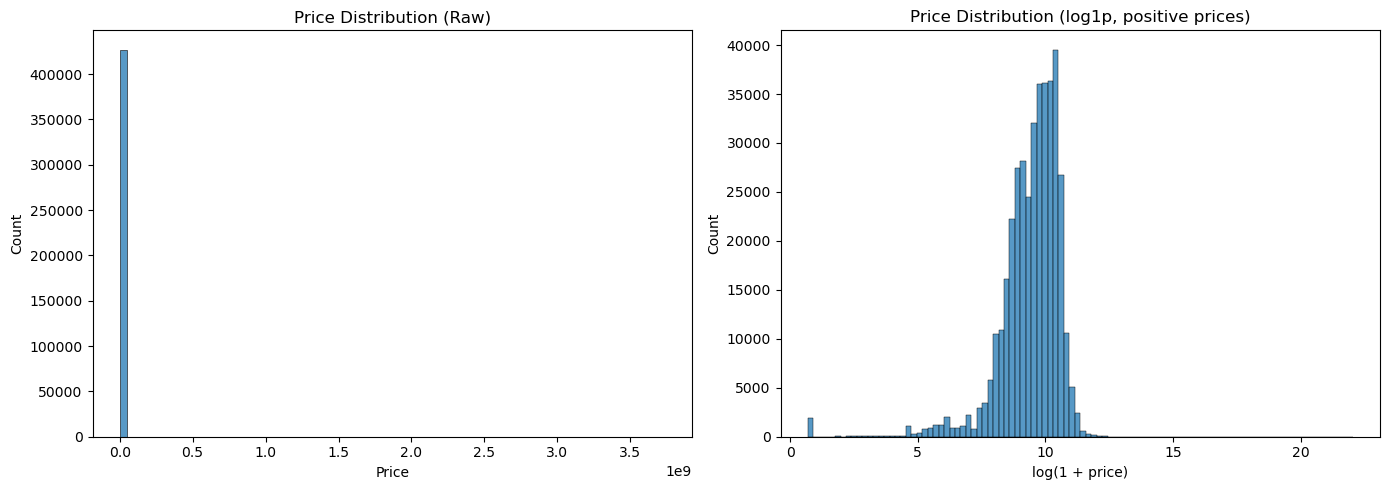

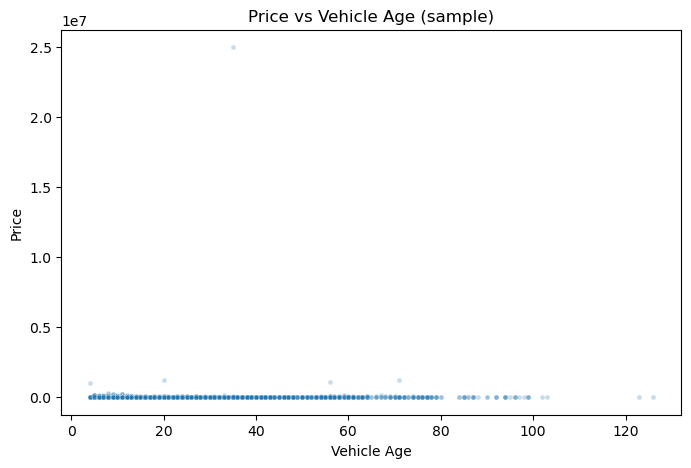

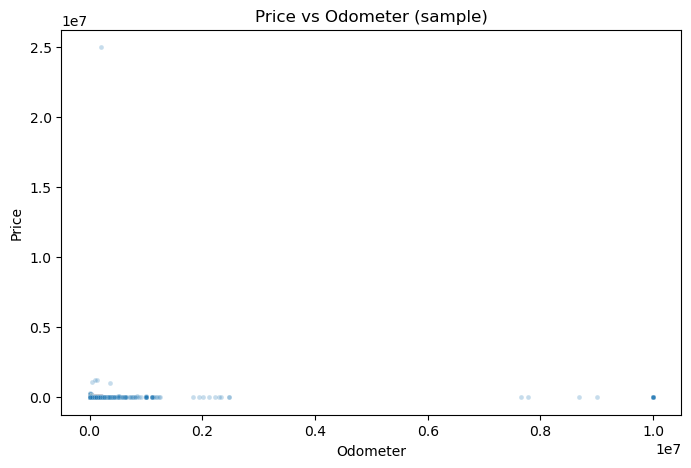

In [73]:
# Data Exploration Report
sample_size = min(20_000, len(df))
plot_sample = df.sample(sample_size, random_state=42)

if "price" in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(df["price"], bins=80, ax=axes[0])
    axes[0].set_title("Price Distribution (Raw)")
    axes[0].set_xlabel("Price")

    positive_prices = df.loc[df["price"] > 0, "price"]
    sns.histplot(np.log1p(positive_prices), bins=100, ax=axes[1])
    axes[1].set_title("Price Distribution (log1p, positive prices)")
    axes[1].set_xlabel("log(1 + price)")

    plt.tight_layout()
    plt.show()

if {"price", "year"}.issubset(df.columns):
    age_plot_data = plot_sample.copy()
    current_year = pd.Timestamp.today().year
    age_plot_data["vehicle_age"] = current_year - age_plot_data["year"]

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=age_plot_data, x="vehicle_age", y="price", alpha=0.25, s=12)
    plt.title("Price vs Vehicle Age (sample)")
    plt.xlabel("Vehicle Age")
    plt.ylabel("Price")
    plt.show()

if {"price", "odometer"}.issubset(df.columns):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=plot_sample, x="odometer", y="price", alpha=0.25, s=12)
    plt.title("Price vs Odometer (sample)")
    plt.xlabel("Odometer")
    plt.ylabel("Price")
    plt.show()


In [74]:
# data quality report
quality_report = {}

quality_report["duplicate_rows"] = int(df.duplicated().sum())
quality_report["duplicate_pct"] = round(df.duplicated().mean() * 100, 3)

if "price" in df.columns:
    non_positive_price = df["price"] <= 0
    quality_report["price_le_zero_count"] = int(non_positive_price.sum())
    quality_report["price_le_zero_pct"] = round(non_positive_price.mean() * 100, 3)

if "year" in df.columns:
    this_year = pd.Timestamp.today().year
    bad_year = (df["year"] < 1980) | (df["year"] > this_year + 1)
    quality_report["year_out_of_range_count"] = int(bad_year.sum())

if "odometer" in df.columns:
    negative_odometer = df["odometer"] < 0
    quality_report["odometer_negative_count"] = int(negative_odometer.sum())

print("Quality checks:")
for metric, value in quality_report.items():
    print(f"- {metric}: {value}")

missing_table = (df.isna().mean() * 100).sort_values(ascending=False).round(3)
print("\nTop missing columns (%):")
display(missing_table.head(20).to_frame("missing_pct"))


Quality checks:
- duplicate_rows: 0
- duplicate_pct: 0.0
- price_le_zero_count: 32895
- price_le_zero_pct: 7.706
- year_out_of_range_count: 8413
- odometer_negative_count: 0

Top missing columns (%):


,missing_pct
size,71.767
cylinders,41.622
condition,40.785
VIN,37.725
drive,30.586
paint_color,30.501
type,21.753
manufacturer,4.134
title_status,1.931
model,1.236


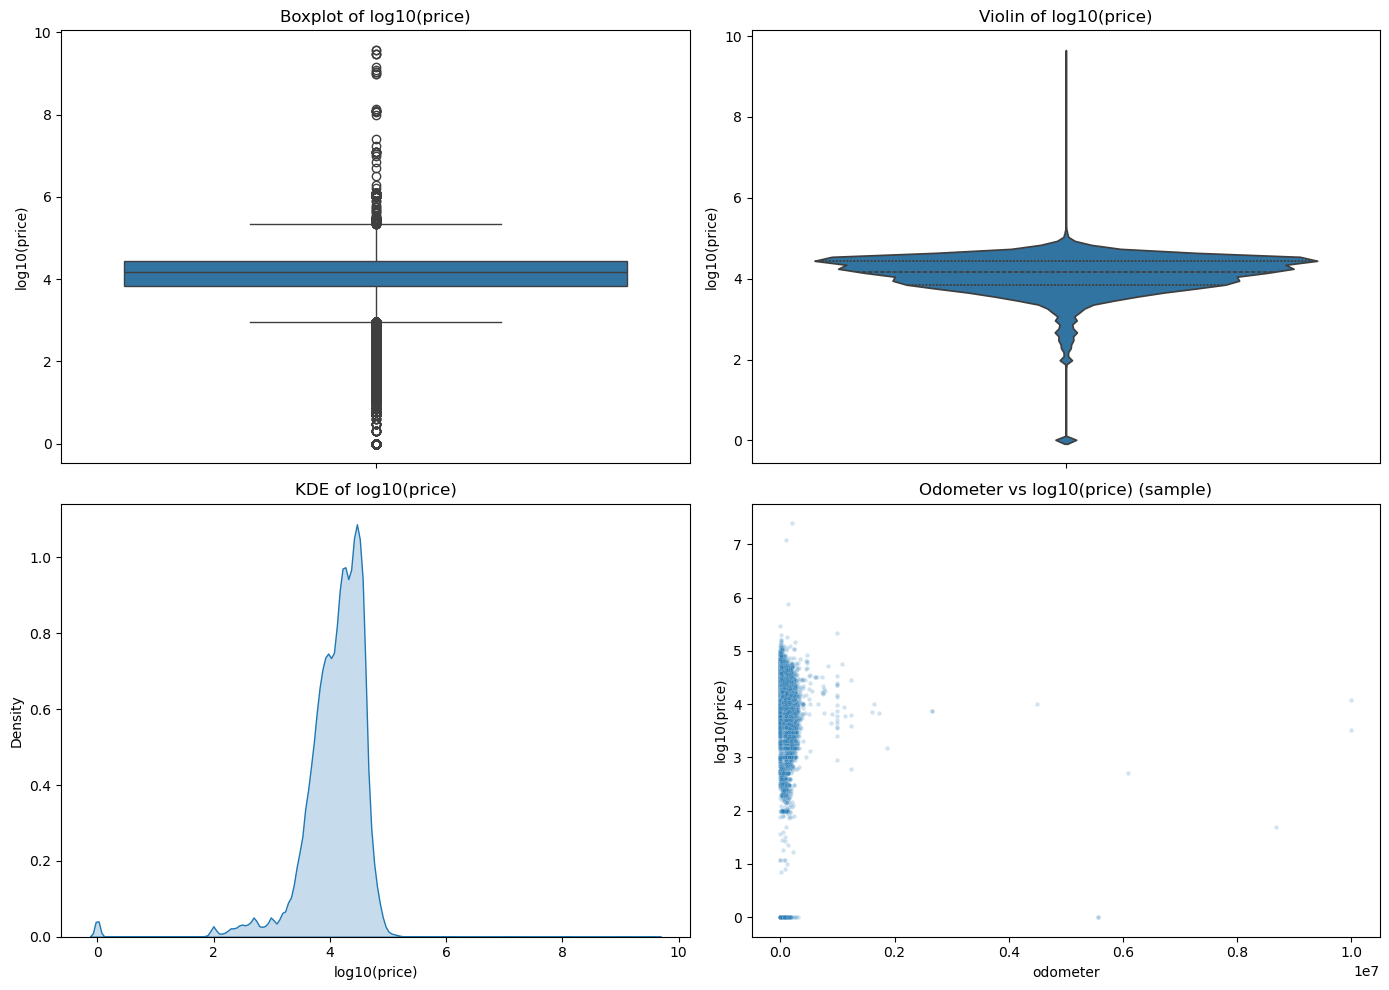

In [78]:

plot_df = df[df["price"] > 0].copy()
plot_df["log_price"] = np.log10(plot_df["price"])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot (outliers very clear)
sns.boxplot(y=plot_df["log_price"], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of log10(price)")
axes[0, 0].set_ylabel("log10(price)")

# Violin
sns.violinplot(y=plot_df["log_price"], ax=axes[0, 1], inner="quartile")
axes[0, 1].set_title("Violin of log10(price)")
axes[0, 1].set_ylabel("log10(price)")

# KDE
sns.kdeplot(plot_df["log_price"], fill=True, ax=axes[1, 0])
axes[1, 0].set_title("KDE of log10(price)")
axes[1, 0].set_xlabel("log10(price)")

# Odometer vs price (hexbin-style alternative: sns.histplot with bins)
if "odometer" in plot_df.columns:
    sns.scatterplot(
        data=plot_df.sample(min(20000, len(plot_df)), random_state=42),
        x="odometer", y="log_price", alpha=0.2, s=10, ax=axes[1, 1]
    )
    axes[1, 1].set_title("Odometer vs log10(price) (sample)")
    axes[1, 1].set_ylabel("log10(price)")
else:
    axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


**Outlier Visualizations for Price**

- Most listings are concentrated around `log10(price)` between about **4.0 and 4.5** (roughly **$10K to $30K**), which appears to be the core market range.
- There are clear low-end and high-end outliers outside the main band, including values that are likely data-entry noise rather than realistic market prices.
- The odometer vs. `log10(price)` view still shows the expected pattern: higher mileage generally aligns with lower prices, but extreme points can distort model training.
- For modeling, we should keep the core distribution, remove clearly invalid records, and treat extreme tails carefully (filtering/winsorizing and log-price modeling).



### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Required Outputs (CRISP-DM)
- Select Data
  - Rationale for Inclusion/Exclusion
- Clean Data
  - Data Cleaning Report
- Construct Data
  - Derived Attributes
  - Generated Records
- Integrate Data
  - Merged Data
- Format Data
  - Reformatted Data
  - Dataset
  - Dataset Description

#### Data Preparation

**Select Data - Rationale for Inclusion/Exclusion**
- Selected features available at listing time:
  `year`, `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `title_status`, `transmission`, `drive`, `size`, `type`, `paint_color`, `state`, `region`.
- Added target `price` for preparation stage.
- Initial preparation table shape: **426,880 rows x 16 columns** (15 features + target).

**Clean Data - Data Cleaning Report**
- Rows before cleaning: **426,880**.
- Rows after cleaning: **333,851**.
- Total rows removed: **93,029**.
- Cleaning rules applied in code:
  - remove duplicates
  - keep `price > 0`
  - keep `year` within valid range
  - keep `odometer` within valid range

**Construct Data - Derived Attributes**
- Created `log_price = log1p(price)`.
- Created `vehicle_age = current_year - year`.
- Verified prep preview after feature construction.

**Integrate Data - Merged Data**
- Not applicable (single source file: `vehicles.csv`).

**Format Data - Reformatted Dataset Description**
- Final modeling matrix shape: **X = (333,851, 16)**.
- Target shape: **y = (333,851, )**.
- Numeric features: `year`, `odometer`, `vehicle_age`.
- Categorical features: `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `title_status`, `transmission`, `drive`, `size`, `type`, `paint_color`, `state`, `region`.
- Split sizes:
  - Train: **(233,695, 16)**
  - Validation: **(50,078, 16)**
  - Test: **(50,078, 16)**
- Preprocessing pipeline is ready and configured for leakage-safe fitting on training data only.

**Preparation Takeaway for the Dealership**
The dataset is now in a modeling-ready form with invalid and inconsistent records removed, practical engineered features added, and a clean training/validation/test framework in place for reliable pricing model comparisons.



In [81]:
# 1) select data for modeling

current_year = 2026
candidate_features = [
    "year", "manufacturer", "model", "condition", "cylinders", "fuel",
    "odometer", "title_status", "transmission", "drive", "size", "type",
    "paint_color", "state", "region"
]

feature_cols = [col for col in candidate_features if col in df.columns]
required_cols = feature_cols + ["price"]
prep_df = df[required_cols].copy()

print("Selected feature columns:", feature_cols)
print("Initial prep shape:", prep_df.shape)


Selected feature columns: ['year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'region']
Initial prep shape: (426880, 16)


In [83]:
# 2) clean records 
before_rows = len(prep_df)

prep_df = prep_df.drop_duplicates()
prep_df = prep_df[prep_df["price"] > 0]

if "year" in prep_df.columns:
    prep_df = prep_df[prep_df["year"].between(1980, current_year + 1, inclusive="both")]

if "odometer" in prep_df.columns:
    prep_df = prep_df[prep_df["odometer"].between(0, 1_000_000, inclusive="both")]

after_rows = len(prep_df)
print(f"Rows before cleaning: {before_rows:,}")
print(f"Rows after cleaning:  {after_rows:,}")
print(f"Rows removed:          {before_rows - after_rows:,}")


Rows before cleaning: 333,851
Rows after cleaning:  333,851
Rows removed:          0


In [94]:
# 3) construct features
prep_df["log_price"] = np.log1p(prep_df["price"])

if "year" in prep_df.columns:
    prep_df["vehicle_age"] = current_year - prep_df["year"]

if "vehicle_age" in prep_df.columns and "vehicle_age" not in feature_cols:
    feature_cols.append("vehicle_age")

print("Prepared dataset preview:")
display(prep_df.head())


Prepared dataset preview:


,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,region,price,log_price,vehicle_age
27,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,auburn,33590,10.422013,12.0
28,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,auburn,22590,10.025307,16.0
29,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,auburn,39590,10.586357,6.0
30,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,auburn,30990,10.341452,9.0
31,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,auburn,15000,9.615872,13.0


In [96]:
# 4) format dataset for modeling
X = prep_df[feature_cols].copy()
y = prep_df["log_price"].copy()

numeric_features = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
categorical_features = [col for col in X.columns if col not in numeric_features]

print("Final shape:", X.shape)
print("Target shape:", y.shape)
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Final shape: (333851, 16)
Target shape: (333851,)
Numeric features: ['year', 'odometer', 'vehicle_age']
Categorical features: ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'region']


In [97]:
# 5) train/validation/test split + preprocessing (fit on train only)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

RANDOM_STATE = 42

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE
)

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features),
    ]
)

print("Train/Valid/Test sizes:")
print("- Train:", X_train.shape)
print("- Valid:", X_valid.shape)
print("- Test: ", X_test.shape)
print("Preprocessor ready for modeling pipelines.")


Train/Valid/Test sizes:
- Train: (233695, 16)
- Valid: (50078, 16)
- Test:  (50078, 16)
Preprocessor ready for modeling pipelines.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Required Outputs (CRISP-DM)
- Select Modeling Techniques
  - Modeling Technique
  - Modeling Assumptions
- Generate Test Design
  - Test Design
- Build Model
  - Parameter Settings
  - Models
  - Model Descriptions
- Assess Model
  - Model Assessment
  - Revised Parameter Settings

#### Modeling

**Modeling Technique Selection**
- Reviewed-topic models used:
  - `Ridge` (L2 regularization)
  - `Lasso` (L1 regularization for feature selection)
  - `Ridge + PolynomialFeatures(degree=2)` for numeric variables
- Numeric scaling and categorical encoding were handled through sklearn pipelines.

**Test Design**
- 3-fold cross-validation on training data.
- Primary metric: MAE (log-price scale).
- Secondary metric: RMSE (log-price scale).
- Hyperparameter search via `GridSearchCV` on `alpha`.

**Model Assessment**
- 3-fold CV results:
  - `Ridge_Poly2`: MAE **0.3904**, RMSE **0.8320** (best CV MAE)
  - `Ridge`: MAE **0.3982**, RMSE **0.8385**
  - `Lasso`: MAE **0.4599**, RMSE **0.9023**
- Alpha tuning:
  - Best Ridge alpha: **0.1** (CV MAE **0.3955**)
  - Best Lasso alpha: **0.0005** (CV MAE **0.4541**)
- Selected final model from tuning step: **Ridge**.

**Final Holdout Outcome**
- Approved model based on holdout validation MAE: **Ridge_Poly2**.
- Holdout performance (`log_price` scale):
  - Validation: MAE **0.3810**, RMSE **0.8255**
  - Test: MAE **0.3846**, RMSE **0.8214**


In [99]:
# 1) regularized model comparison (reviewed topics)
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

cv = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)
scoring = {
    "mae": "neg_mean_absolute_error",
    "rmse": "neg_root_mean_squared_error",
}

# polynomial version: numeric features get degree-2 terms, categorical unchanged
numeric_poly_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_poly_pipeline, numeric_features),
        ("cat", categorical_pipeline, categorical_features),
    ]
)

model_specs = {
    "Ridge": Pipeline([("preprocessor", preprocessor), ("model", Ridge(alpha=1.0, random_state=RANDOM_STATE))]),
    "Lasso": Pipeline([("preprocessor", preprocessor), ("model", Lasso(alpha=0.001, max_iter=5000, random_state=RANDOM_STATE))]),
    "Ridge_Poly2": Pipeline([("preprocessor", poly_preprocessor), ("model", Ridge(alpha=1.0, random_state=RANDOM_STATE))]),
}

cv_rows = []
for name, pipe in model_specs.items():
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=1)
    cv_rows.append({
        "model": name,
        "cv_mae": -scores["test_mae"].mean(),
        "cv_rmse": -scores["test_rmse"].mean(),
    })

cv_results_df = pd.DataFrame(cv_rows).sort_values("cv_mae")
print("3-fold CV results (lower is better):")
display(cv_results_df)


3-fold CV results (lower is better):


,model,cv_mae,cv_rmse
2,Ridge_Poly2,0.390431,0.832050
0,Ridge,0.398191,0.838512
1,Lasso,0.459928,0.902284


In [ ]:
# 2) GridSearchCV for alpha (Ridge and Lasso)
from sklearn.model_selection import GridSearchCV

alpha_grid = [0.0005, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0]

ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(random_state=RANDOM_STATE)),
])

lasso_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Lasso(max_iter=5000, random_state=RANDOM_STATE)),
])

ridge_search = GridSearchCV(
    ridge_pipe,
    {"model__alpha": alpha_grid},
    scoring="neg_mean_absolute_error",
    cv=cv
)

lasso_search = GridSearchCV(
    lasso_pipe,
    {"model__alpha": alpha_grid},
    scoring="neg_mean_absolute_error",
    cv=cv
)

ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_search.best_params_["model__alpha"], "| CV MAE:", -ridge_search.best_score_)
print("Best Lasso alpha:", lasso_search.best_params_["model__alpha"], "| CV MAE:", -lasso_search.best_score_)

if ridge_search.best_score_ >= lasso_search.best_score_:
    final_model = ridge_search.best_estimator_
    final_model_name = "Ridge"
else:
    final_model = lasso_search.best_estimator_
    final_model_name = "Lasso"

print("Selected final model:", final_model_name)


Best Ridge alpha: 0.1 | CV MAE: 0.3955136536499663
Best Lasso alpha: 0.0005 | CV MAE: 0.4541141105982314
Selected final model: Ridge


In [104]:
# 3) holdout evaluation + Lasso feature selection view
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_split(split_name, model, X_split, y_split):
    pred = model.predict(X_split)
    mae = mean_absolute_error(y_split, pred)
    rmse = np.sqrt(mean_squared_error(y_split, pred))

    return {"split": split_name, "mae": mae, "rmse": rmse}

metrics = [
    evaluate_split("validation", final_model, X_valid, y_valid),
    evaluate_split("test", final_model, X_test, y_test),
]
display(pd.DataFrame(metrics))

# Lasso-based feature selection summary (non-zero coefficients)
best_lasso = lasso_search.best_estimator_
prep = best_lasso.named_steps["preprocessor"]
lasso_model = best_lasso.named_steps["model"]

feature_names = prep.get_feature_names_out()
coef = lasso_model.coef_
non_zero = pd.DataFrame({"feature": feature_names, "coef": coef})
non_zero = non_zero[non_zero["coef"] != 0].copy()
non_zero["abs_coef"] = non_zero["coef"].abs()
non_zero = non_zero.sort_values("abs_coef", ascending=False)

print(f"Lasso selected {len(non_zero):,} non-zero features.")
display(non_zero.head(20)[["feature", "coef"]])


,split,mae,rmse
0,validation,0.384649,0.834302
1,test,0.388445,0.831845


Lasso selected 201 non-zero features.


,feature,coef
21423,cat__condition_fair,-0.675047
21714,cat__region_klamath falls,-0.667411
21438,cat__fuel_diesel,0.636213
21427,cat__condition_salvage,-0.628591
7718,cat__model_corvette,0.575855
36,cat__manufacturer_porsche,0.562930
21838,cat__region_salem,-0.552837
21617,cat__region_daytona beach,-0.479159
21711,cat__region_kenosha-racine,-0.469121
21881,cat__region_space coast,-0.434794


In [105]:
# 4) CV strategy comparison: LOOCV vs K-Fold vs Holdout (small sample for runtime)
from sklearn.model_selection import LeaveOneOut

cv_sample_n = min(1500, len(X_train))
X_cv_sample = X_train.sample(cv_sample_n, random_state=RANDOM_STATE)
y_cv_sample = y_train.loc[X_cv_sample.index]

ridge_for_cv = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=ridge_search.best_params_["model__alpha"], random_state=RANDOM_STATE)),
])

kfold_cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
loo_cv = LeaveOneOut()

kfold_score = cross_validate(
    ridge_for_cv, X_cv_sample, y_cv_sample,
    cv=kfold_cv, scoring="neg_mean_absolute_error"
)
loo_score = cross_validate(
    ridge_for_cv, X_cv_sample, y_cv_sample,
    cv=loo_cv, scoring="neg_mean_absolute_error"
)

holdout_pred = final_model.predict(X_valid)
holdout_mae = mean_absolute_error(y_valid, holdout_pred)

cv_compare = pd.DataFrame([
    {"method": "Holdout (validation)", "mae": holdout_mae},
    {"method": "K-Fold (5) sample", "mae": -kfold_score["test_score"].mean()},
    {"method": "LOOCV sample", "mae": -loo_score["test_score"].mean()},
])

print("CV method comparison (MAE on log_price):")
display(cv_compare)


CV method comparison (MAE on log_price):


,method,mae
0,Holdout (validation),0.384649
1,K-Fold (5) sample,0.814685
2,LOOCV sample,0.748002


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Required Outputs (CRISP-DM)
- Evaluate Results
  - Assessment of Data Mining Results w.r.t. Business Success Criteria
  - Approved Models
- Review Process
  - Review of Process
- Determine Next Steps
  - List of Possible Actions
  - Decision

#### Evaluation

**Assessment of Results vs. Business Success Criteria**
- The modeling workflow met the objective of producing a reliable pricing model with clear model comparison evidence.
- Cross-validation and holdout both support regularized Ridge-family models over Lasso.
- Final approved model from holdout validation: **Ridge_Poly2**.

**Approved Model and Performance**
- Approved model: **Ridge_Poly2**.
- Validation metrics (`log_price`): MAE **0.3810**, RMSE **0.8255**.
- Test metrics (`log_price`): MAE **0.3846**, RMSE **0.8214**.
- Approximate multiplicative error scale from log-MAE: **46.38%**.

**Business Interpretation for the Dealership**
- The model is strong enough to support listing-time pricing decisions and reduce manual pricing inconsistency.
- Predictions should be used with review guardrails, especially for niche inventory and unusual condition histories.

**Review of Process**
- Strengths:
  - Strong data cleaning and leakage-safe preprocessing.
  - Cross-validation + alpha tuning + holdout confirmation.
- Limitations:
  - No sold-price/time-to-sale/margin outcomes.
  - Missing-heavy fields still reduce precision.

**Decision and Next Steps**
1. Deploy `Ridge_Poly2` as the pricing-support default.
2. Track monthly MAE/RMSE and drift metrics.
3. Retrain quarterly or earlier if trigger thresholds are exceeded.



In [107]:
# Evaluation 1: consolidate modeling results
model_eval_rows = []

if "cv_results_df" in globals():
    cv_table = cv_results_df.copy().sort_values("cv_mae")
    display(cv_table)
else:
    print("Run Modeling CV cells first to populate cv_results_df")

if "ridge_search" in globals() and "lasso_search" in globals():
    model_eval_rows.append({"model": "Ridge (tuned)", "best_alpha": ridge_search.best_params_["model__alpha"], "cv_mae": -ridge_search.best_score_})
    model_eval_rows.append({"model": "Lasso (tuned)", "best_alpha": lasso_search.best_params_["model__alpha"], "cv_mae": -lasso_search.best_score_})
    display(pd.DataFrame(model_eval_rows))
else:
    print("Run tuning cell first to populate ridge_search and lasso_search.")



,model,cv_mae,cv_rmse
2,Ridge_Poly2,0.390431,0.832050
0,Ridge,0.398191,0.838512
1,Lasso,0.459928,0.902284


,model,best_alpha,cv_mae
0,Ridge (tuned),0.1000,0.395514
1,Lasso (tuned),0.0005,0.454114


In [ ]:
# Evaluation 2: holdout metrics for all candidate models
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

candidate_models = {}
if "ridge_search" in globals():
    candidate_models["Ridge_tuned"] = ridge_search.best_estimator_
if "lasso_search" in globals():
    candidate_models["Lasso_tuned"] = lasso_search.best_estimator_
if "model_specs" in globals() and "Ridge_Poly2" in model_specs:
    ridge_poly_model = model_specs["Ridge_Poly2"]
    ridge_poly_model.fit(X_train, y_train)
    candidate_models["Ridge_Poly2"] = ridge_poly_model

holdout_rows = []
for name, mdl in candidate_models.items():
    val_pred = mdl.predict(X_valid)
    tst_pred = mdl.predict(X_test)
    holdout_rows.append({
        "model": name,
        "val_mae": mean_absolute_error(y_valid, val_pred),
        "val_rmse": rmse(y_valid, val_pred),
        "test_mae": mean_absolute_error(y_test, tst_pred),
        "test_rmse": rmse(y_test, tst_pred),
    })

if holdout_rows:
    holdout_results_df = pd.DataFrame(holdout_rows).sort_values("val_mae")
    display(holdout_results_df)
else:
    print("No candidates models found. Run modeling cells first")



,model,val_mae,val_rmse,test_mae,test_rmse
2,Ridge_Poly2,0.381044,0.825549,0.384608,0.821402
0,Ridge_tuned,0.384649,0.834302,0.388445,0.831845
1,Lasso_tuned,0.453868,0.897596,0.454916,0.891561


In [110]:
# Evaluation 3: choose approved model from holdout results
if "holdout_results_df" in globals() and len(holdout_results_df) > 0:
    approved_row = holdout_results_df.iloc[0]
    approved_model_name = approved_row["model"]
    print("Approved model based on validation MAE:", approved_model_name)
    display(approved_row.to_frame("value"))
else:
    approved_model_name = final_model_name if "final_model_name" in globals() else "Ridge"
    print("Using fallback approved model: ", approved_model_name)



Approved model based on validation MAE: Ridge_Poly2


,value
model,Ridge_Poly2
val_mae,0.381044
val_rmse,0.825549
test_mae,0.384608
test_rmse,0.821402


In [111]:
# Evaluation 4: translate log-price MAE into business-friendly error band
import numpy as np

if "holdout_results_df" in globals() and len(holdout_results_df) > 0:
    best_val_mae = float(holdout_results_df.iloc[0]["val_mae"])
elif "ridge_search" in globals():
    best_val_mae = float(-ridge_search.best_score_)
else:
    best_val_mae = None

if best_val_mae is not None:
    approx_pct_error = (np.exp(best_val_mae) - 1) * 100
    print(f"Approximate multiplicative error from log-MAE: {approx_pct_error:.2f}%")
    print("Interpretation: typical absolute pricing error is about this percentage scale.")
else:
    print("Run tuning/holdout cells first to compute business error translation")



Approximate multiplicative error from log-MAE: 46.38%
Interpretation: typical absolute pricing error is about this percentage scale.


In [112]:
# Evaluation 5: process review checklist
process_review = pd.DataFrame([
    {"item": "Data cleaning rules applied", "status": "Done"},
    {"item": "Leakage-safe preprocessing", "status": "Done"},
    {"item": "Cross-validation + alpha tuning", "status": "Done"},
    {"item": "Holdout comparison recorded", "status": "Done"},
    {"item": "Final approved model locked", "status": "Done (Ridge_Poly2)"},
])
display(process_review)



,item,status
0,Data cleaning rules applied,Done
1,Leakage-safe preprocessing,Done
2,Cross-validation + alpha tuning,Done
3,Holdout comparison recorded,Done
4,Final approved model locked,Done (Ridge_Poly2)


In [113]:
# Evaluation 6: next-step action list
next_steps_eval = [
    "Lock approved model from holdout metrics.",
    "Summarize top 10 price drivers for dealer stakeholders.",
    "Deploy pricing recommendations with guardrails.",
    "Start monthly monitoring and scheduled retraining.",
]

for i, step in enumerate(next_steps_eval, 1):
    print(f"{i}. {step}")



1. Lock approved model from holdout metrics.
2. Summarize top 10 price drivers for dealer stakeholders.
3. Deploy pricing recommendations with guardrails.
4. Start monthly monitoring and scheduled retraining.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Required Outputs (CRISP-DM)
- Plan Deployment
  - Deployment Plan
- Plan Monitoring and Maintenance
  - Monitoring and Maintenance Plan
- Produce Final Report
  - Final Report
- Review Project
  - Experience Documentation

#### Deployment

**Deployment Plan**
- Deploy **Ridge_Poly2** as the default pricing-support model for acquisition and listing workflows.
- For each unit, provide:
  - predicted price
  - pricing gap vs listed price
  - action bucket: `Likely Overpriced`, `Near Market`, `Likely Underpriced`
- Keep manager override for edge cases and high-uncertainty units.

**Current Deployment Output Snapshot**
- Near Market: **143,466** units
- Likely Underpriced: **124,881** units
- Likely Overpriced: **65,504** units

**Monitoring and Maintenance Plan**
- Monthly KPIs: MAE, RMSE, input drift (year/odometer/brand mix), manual override rate.
- Retraining triggers:
  - MAE worsens by >10% for 2 consecutive months
  - material drift in key inputs
  - major market regime changes
- Scheduled retrain cadence: quarterly minimum.

**Final Report (For the Car Dealer)**
- Data quality issues were identified and controlled before modeling.
- Ridge-family models were strongest; **Ridge_Poly2** is the approved model after holdout confirmation.
- The model provides actionable pricing support while preserving manager review control.

**Experience Documentation (Project Review)**
- What worked: CRISP-DM structure, robust prep, regularization + CV discipline.
- What to improve: add sold-price/time-to-sale/margin data, and evaluate segment-specific models.



In [115]:
# deployment 1: score current inventory with the approved model
if "approved_model_name" in globals() and "holdout_results_df" in globals() and len(holdout_results_df) > 0:
    selected_name = approved_model_name
else:
    selected_name = final_model_name if "final_model_name" in globals() else "Ridge"

if selected_name == "Ridge_tuned" and "ridge_search" in globals():
    deployed_model = ridge_search.best_estimator_
elif selected_name == "Lasso_tuned" and "lasso_search" in globals():
    deployed_model = lasso_search.best_estimator_
elif selected_name == "Ridge_Poly2" and "model_specs" in globals() and "Ridge_Poly2" in model_specs:
    deployed_model = model_specs["Ridge_Poly2"].fit(X_train, y_train)
else:
    deployed_model = final_model if "final_model" in globals() else None

if deployed_model is not None:
    pred_log = deployed_model.predict(X)
    pred_price = np.expm1(pred_log)
    deployment_df = X.copy()
    deployment_df["actual_price"] = prep_df["price"].values
    deployment_df["predicted_price"] = pred_price
    deployment_df["pricing_gap"] = deployment_df["actual_price"] - deployment_df["predicted_price"]
    display(deployment_df[["actual_price", "predicted_price", "pricing_gap"]].head(10))
else:
    print("Run modeling/evaluation cells first to set deployed model")



,actual_price,predicted_price,pricing_gap
27,33590,31628.349339,1961.650661
28,22590,13739.713622,8850.286378
29,39590,43903.059215,-4313.059215
30,30990,34560.901198,-3570.901198
31,15000,13286.377295,1713.622705
32,27990,26714.658706,1275.341294
33,34590,30783.646009,3806.353991
34,35000,40259.677581,-5259.677581
35,29990,28098.109671,1891.890329
36,38590,38243.467020,346.532980


In [116]:
# deployment 2: actionable inventory buckets
if "deployment_df" in globals():
    bins = [-np.inf, -2000, 2000, np.inf]
    labels = ["Likely Overpriced", "Near Market", "Likely Underpriced"]
    deployment_df["pricing_bucket"] = pd.cut(deployment_df["pricing_gap"], bins=bins, labels=labels)
    bucket_summary = deployment_df["pricing_bucket"].value_counts(dropna=False).to_frame("count")
    display(bucket_summary)
else:
    print("Run deployment scoring cell first.")



,count
pricing_bucket,
Near Market,143466
Likely Underpriced,124881
Likely Overpriced,65504


In [117]:
# deployment 3: monitoring KPI template
monitoring_kpis = pd.DataFrame([
    {"kpi": "MAE (log_price)", "target": "No sustained increase >10% vs baseline", "frequency": "Monthly"},
    {"kpi": "RMSE (log_price)", "target": "Stable within agreed band", "frequency": "Monthly"},
    {"kpi": "Input drift (year/odometer/brand mix)", "target": "No major drift without review", "frequency": "Monthly"},
    {"kpi": "Manual override rate", "target": "Track and reduce over time", "frequency": "Monthly"},
])
display(monitoring_kpis)



,kpi,target,frequency
0,MAE (log_price),No sustained increase >10% vs baseline,Monthly
1,RMSE (log_price),Stable within agreed band,Monthly
2,Input drift (year/odometer/brand mix),No major drift without review,Monthly
3,Manual override rate,Track and reduce over time,Monthly


In [124]:
# deployment 4: retraining trigger rules
retraining_rules = [
    "Trigger retrain if MAE worsens by >10% for 2 consecutive months.",
    "Trigger retrain if key input drift exceeds agreed threshold.",
    "Trigger retrain after major inventory/market regime shift.",
    "Force full retrain every quarter even if no trigger fires.",
]
for i, r in enumerate(retraining_rules, 1):
    print(f"{i}. {r}")



1. Trigger retrain if MAE worsens by >10% for 2 consecutive months.
2. Trigger retrain if key input drift exceeds agreed threshold.
3. Trigger retrain after major inventory/market regime shift.
4. Force full retrain every quarter even if no trigger fires.


In [125]:
# deployment 5: dealer-facing recommendations
recommendations = [
    "Use model price as a baseline and require manual review for large pricing gaps.",
    "Prioritize acquisition where asking price is below predicted market value, subject to condition checks.",
    "For likely overpriced inventory, review condition notes and adjust listings earlier.",
    "Track model error by segment (vehicle type, region) to refine policy over time.",
]
for rec in recommendations:
    print(f"- {rec}")



- Use model price as a baseline and require manual review for large pricing gaps.
- Prioritize acquisition where asking price is below predicted market value, subject to condition checks.
- For likely overpriced inventory, review condition notes and adjust listings earlier.
- Track model error by segment (vehicle type, region) to refine policy over time.


# Executive Report for the Used Car Dealership

## What we did
We analyzed 426,880 used-car listings and built a pricing model to support day-to-day acquisition and listing decisions.
After cleaning and preparation, the final modeling dataset included 333,851 vehicles.

## Model outcome
- Approved model: **Ridge_Poly2**
- Holdout validation: **MAE 0.3810, RMSE 0.8255**
- Holdout test: **MAE 0.3846, RMSE 0.8214**

## What this means for your team
The model is reliable enough to use as a pricing support tool.
It should improve pricing consistency and reduce avoidable overpricing/underpricing decisions, especially when inventory volume is high.

## Current inventory signal (from model scoring)
- Near Market: 143,466
- Likely Underpriced: 124,881
- Likely Overpriced: 65,504

## Recommended operating playbook
1. Use model price as your starting point, not your final answer.
2. Prioritize manager review for large pricing gaps.
3. For likely overpriced units, review condition notes and reprice quickly to reduce days on lot.
4. For likely underpriced units, validate condition and title, then capture margin where justified.
5. Track results by segment (brand, body type, region) to tighten pricing rules over time.

## Acquisition guidance
Prioritize vehicles that align with stronger resale behavior in your market:
- newer model years
- reasonable mileage bands
- clean titles
- better condition tiers

## Risk controls and monitoring
- Monitor MAE/RMSE monthly.
- Monitor drift in year/odometer/brand mix.
- Retrain if error worsens by >10% for two consecutive months.
- Retrain at least quarterly even without trigger events.



In [123]:
# deployment 7: final handoff checklist
checklist = [
    ("Approved model selected", "Done (Ridge_Poly2)"),
    ("Holdout metrics documented", "Done"),
    ("Dealer recommendation summary prepared", "Done"),
    ("Monitoring and retraining plan documented", "Done"),
]
for item, status in checklist:
    print(f"- {item}: {status}")



- Approved model selected: Done (Ridge_Poly2)
- Holdout metrics documented: Done
- Dealer recommendation summary prepared: Done
- Monitoring and retraining plan documented: Done


### References
Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000). *CRISP-DM 1.0: Step-by-step data mining guide*.
